<a href="https://colab.research.google.com/github/nisha1365/TECHNICAL_TRAINING_CTS/blob/main/Nisha2211566_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment_2: Ensemble Methods for Classification**

Business Case: Build a classifier model to predict the credit card defaulter for given dataset

1.	Import Libraries/Dataset (1 mark)
•	Import the required libraries and the dataset 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Importing the CSV file using Pandas Library

In [2]:
df = pd.read_csv('/content/credit_card_defaulters.csv')

First five datasets

In [3]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


Last Five Values

In [4]:
df.tail()

,Unnamed: 0,default,student,balance,income
9995,9996,No,No,711.555020,52992.37891
9996,9997,No,No,757.962918,19660.72177
9997,9998,No,No,845.411989,58636.15698
9998,9999,No,No,1569.009053,36669.11236
9999,10000,No,Yes,200.922183,16862.95232


2.	Data Visualisation and Augmentation (0.5*6 = 3 marks)
•	Plot at least two EDA graphs (use matplotlib/seaborn/any other library)

•	Prepare data to be able to build a classification model 

•	Bring the train and test data in the required format

•	Perform missing values check 

•	Perform scaling of data

•	Print the shapes of train and test data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


Statistical Description - 

In [7]:
df.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


Checking the shape of the dataset

In [8]:
df.shape

(10000, 5)

Checking the null values in the data set

In [9]:
df.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

Conclusion on null values - There are no null values so we don't have to use any imputation method.

Checking the Correlation

In [10]:
df.corr()

,Unnamed: 0,balance,income
Unnamed: 0,1.000000,0.010342,-0.001427
balance,0.010342,1.000000,-0.152243
income,-0.001427,-0.152243,1.000000


Some Conclusion - 
* There is negative correlation between Unnamed and income

* Negative Correlation between balance and income

* Negative Correlation between income and balance

* Negative Correlation between Unnamed and income

Checking datatypes

In [12]:
df.dtypes

Unnamed: 0      int64
default        object
student        object
balance       float64
income        float64
dtype: object

Value counts for variable "default".







In [13]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

Value counts for variable "student".

In [14]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

MIN & MAX value for variable "balance"

In [15]:
df['balance'].max()

2654.322576

In [16]:
df['balance'].min()

0.0

MIN & MAX value for variable "income"

In [17]:
df['income'].max()

73554.2335

In [18]:
df['income'].min()

771.9677294

Checking for Duplicate values.

In [25]:
df.duplicated().sum()

0

Some **EDA**

1.Pairplot

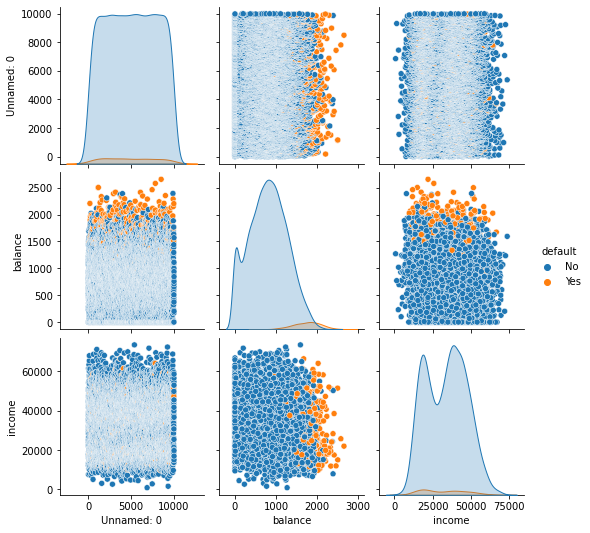

In [27]:
sns.pairplot(df,hue="default")

HEATMAP

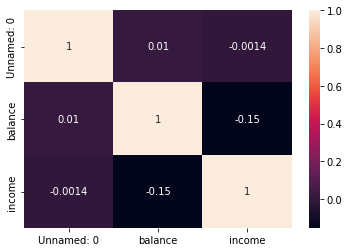

In [19]:
sns.heatmap(df.corr(),annot=True)

HISTOGRAMS

1. INCOME

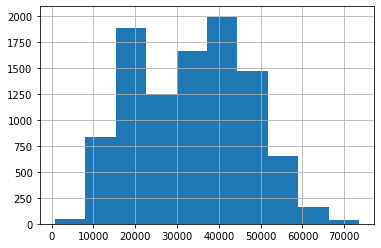

In [20]:
df['income'].hist()

2. BALANCE

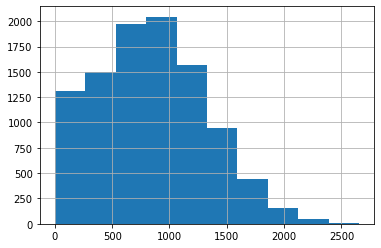

In [21]:
df['balance'].hist()

3. STUDENT

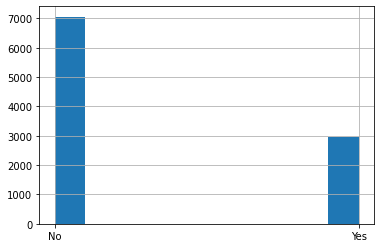

In [22]:
df['student'].hist()

4. DEFAULT

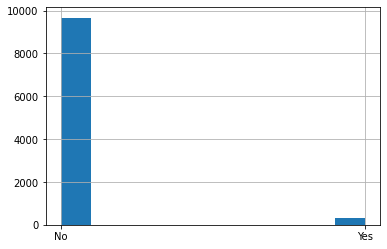

In [23]:
df['default'].hist()

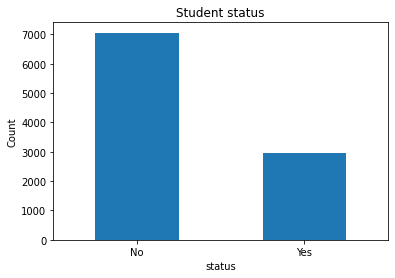

COUNT-PLOTS

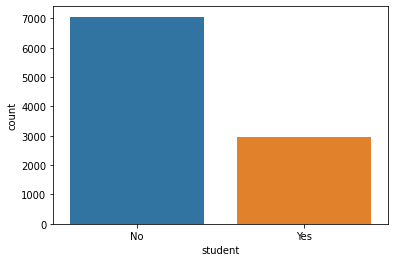

In [28]:
sns.countplot(data=df, x="student")

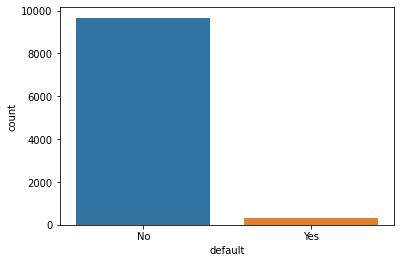

In [29]:
sns.countplot(data=df, x="default")

DISTPLOTS

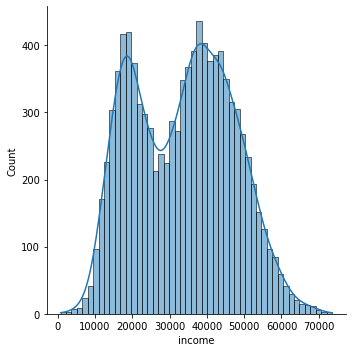

In [30]:
sns.displot(data=df, x="income",kde=True, bins=50)

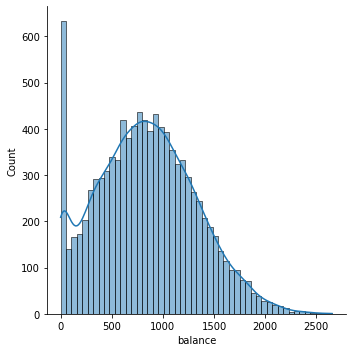

In [32]:
sns.displot(data=df, x="balance",kde=True, bins=50)

BOX-PLOTS

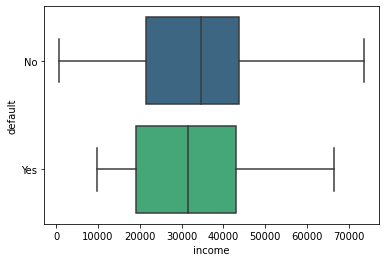

In [33]:
sns.boxplot(data=df,x="income",y="default", palette="viridis")

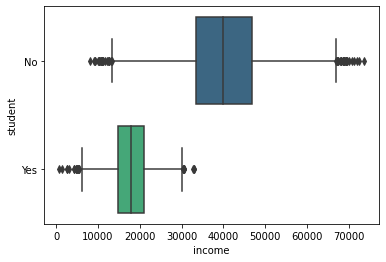

In [35]:
sns.boxplot(data=df,y="student",x="income", palette="viridis")

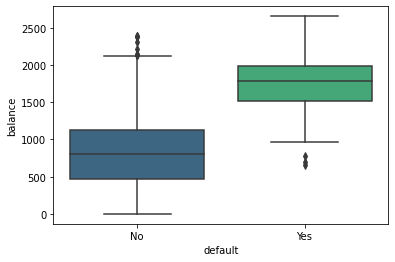

In [36]:
sns.boxplot(data=df, x="default", y="balance", palette="viridis")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


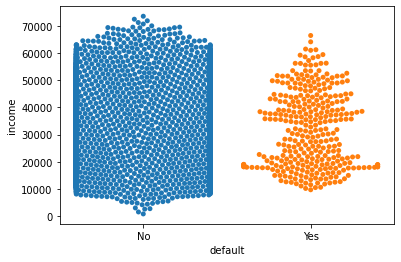

In [37]:
sns.swarmplot(data=df,x="default",y="income")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


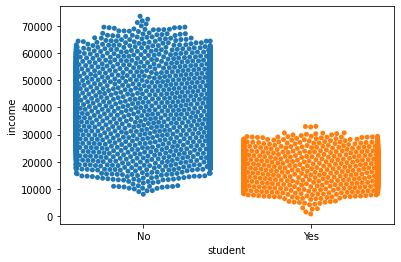

In [38]:
sns.swarmplot(data=df,x="student",y="income")

• Prepare data to be able to build a classification model

label_encoder object knows how to understand word labels.

In [54]:
#importing metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

#for label encoding
from sklearn import preprocessing

#importing models

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

# Importing LabelEncoder from sci-kit learn
from sklearn.preprocessing import LabelEncoder

# Importing StandardScalar
from sklearn.preprocessing import StandardScaler

# Importing XGBoost
import xgboost as xgb

In [55]:
label_encoder = preprocessing.LabelEncoder()
  

Encode labels

In [56]:
df['default']= label_encoder.fit_transform(df['default'])
df['default'].unique()

array([0, 1])

In [57]:
df['student']= label_encoder.fit_transform(df['student'])
df['student'].unique()

array([0, 1])

In [58]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [59]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.62507
1,0,1,817.180407,12106.13470
2,0,0,1073.549164,31767.13895
3,0,0,529.250605,35704.49394
4,0,0,785.655883,38463.49588


Bring the train and test data in the required format

In [60]:
x=df.drop("default",axis=1)
y=df["default"]

In [61]:
x

,student,balance,income
0,0,729.526495,44361.62507
1,1,817.180407,12106.13470
2,0,1073.549164,31767.13895
3,0,529.250605,35704.49394
4,0,785.655883,38463.49588
...,...,...,...
9995,0,711.555020,52992.37891
9996,0,757.962918,19660.72177
9997,0,845.411989,58636.15698
9998,0,1569.009053,36669.11236


In [62]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: int64

splitting of the data into train and test

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101) 

• Print the shapes of train and test data

In [64]:
print("Shape of the training data of X: ",x_train.shape)
print("Shape of the training data of y: ",y_train.shape)
print("Shape of the testing data of X: ",x_test.shape)
print("Shape of the testing data of y: ",y_test.shape)

Shape of the training data of X:  (7000, 3)
Shape of the training data of y:  (7000,)
Shape of the testing data of X:  (3000, 3)
Shape of the testing data of y:  (3000,)


Random Forest Classifier Model Building

In [65]:
# RandomForestClassifier
rfc = RandomForestClassifier()

# Fitting the model to the training data
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
# Predictions 
rf_pred = rfc.predict(x_test)

In [67]:
# Model Evaluation

print("Accuracy Score: ",accuracy_score(y_test,rf_pred))
print("F1 Score: ", f1_score(y_test,rf_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,rf_pred))
print("\n")
print("Classification report: \n", classification_report(y_test,rf_pred))
print("ROC_AUC score: ",roc_auc_score(y_test,rf_pred))

Accuracy Score:  0.971
F1 Score:  0.39999999999999997
Confusion Matrix: 
 [[2884   22]
 [  65   29]]


Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      2906
           1       0.57      0.31      0.40        94

    accuracy                           0.97      3000
   macro avg       0.77      0.65      0.69      3000
weighted avg       0.97      0.97      0.97      3000

ROC_AUC score:  0.6504700472975943


EVALUATION:


Accuracy is 97% , where F1 score is 39% confusion matrix contains, [[TP(2884) FP(22) FN(65) TN(29)]]

FOR non defaults precession(98%), recall(99%) and f1 score(99%) FOR defaults precession(59%), recall(31%) and f1 score(41%)

where f1 score is the harmonic mean of recall and precision

In [68]:
#ROC plotting
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test, rf_pred)

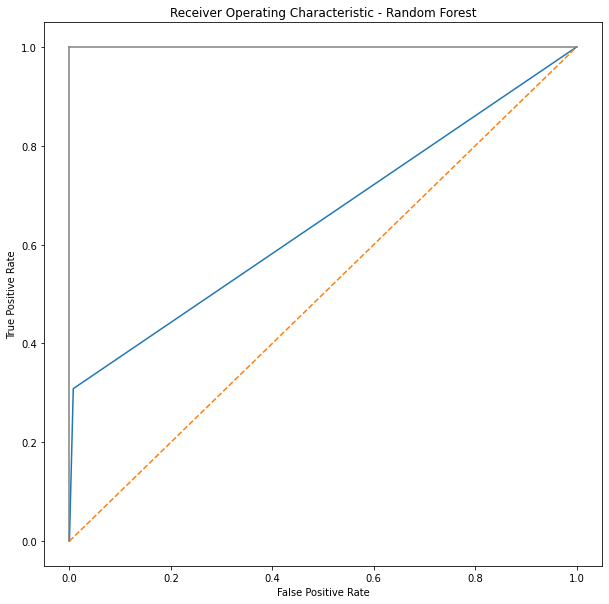

In [69]:
# Plotting the ROC curve for Random Forest model
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


XGBoost Classifier Model Building

In [70]:
# XGBClassifier
xg_model = xgb.XGBClassifier()

# Fitting the model on the training dataset
xg_model.fit(x_train,y_train)

print(xg_model)

XGBClassifier()


In [71]:
#prediction

pred_xg=xg_model.predict(x_test)

In [72]:
# Model Evaluation

print("Accuracy Score: ",accuracy_score(y_test,pred_xg))
print("F1 Score: ", f1_score(y_test,pred_xg))
print("Confusion Matrix: \n", confusion_matrix(y_test,pred_xg))
print("\n")
print("Classification report: \n", classification_report(y_test,pred_xg))
print("ROC_AUC score: ",roc_auc_score(y_test,pred_xg))

Accuracy Score:  0.9753333333333334
F1 Score:  0.4393939393939394
Confusion Matrix: 
 [[2897    9]
 [  65   29]]


Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2906
           1       0.76      0.31      0.44        94

    accuracy                           0.98      3000
   macro avg       0.87      0.65      0.71      3000
weighted avg       0.97      0.98      0.97      3000

ROC_AUC score:  0.6527067988461144


EVALUATION:

Accuracy score is 98% where F1 score is 43%
confusion matrix contains,
[[TP(2897)  FP(9)
  FN(65)    TN(29)]]


  FOR non defaults precession(98%), recall(100%) and f1 score(99%)
   FOR defaults precession(76%), recall(31%) and f1 score(44%)



   where f1 score is the harmonic mean of recall and precision

In [73]:
#roc
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test, pred_xg)

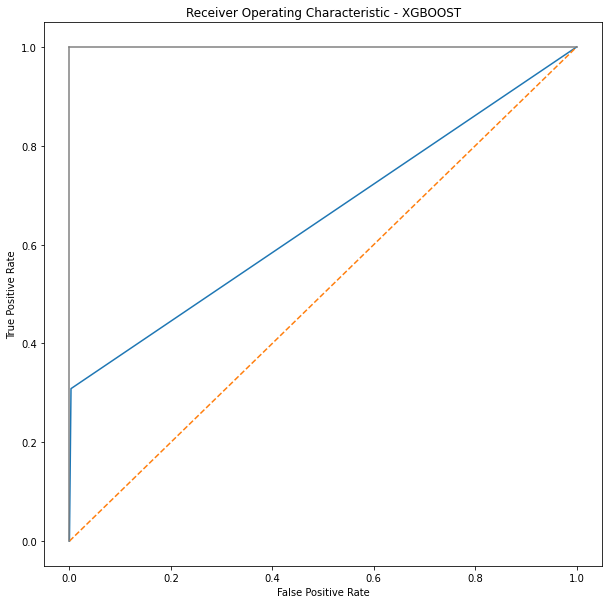

In [74]:
# Plotting the ROC curve for XGBOOST model
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XGBOOST')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**`**COMPARISON BETWEEN XG BOOST AND RANDOM FOREST USING AUC AND ROC CURVE.**`**

In [76]:
import matplotlib

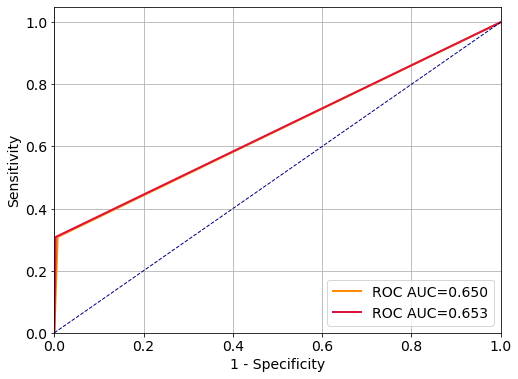

In [79]:
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc


plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, rf_pred)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, pred_xg)
plt.plot(fpr, tpr, color='crimson', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

ROC_AUC score for RandomForest: 0.6508141629204435 ROC_AUC score for XGBoost: 0.6527067988461144

Since the Area Under the ROC in RandomForest and

XGBoost is more or less same 

# `In this case both are doing the equal amount of job in terms of accuracy.`